In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
!pip3 install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


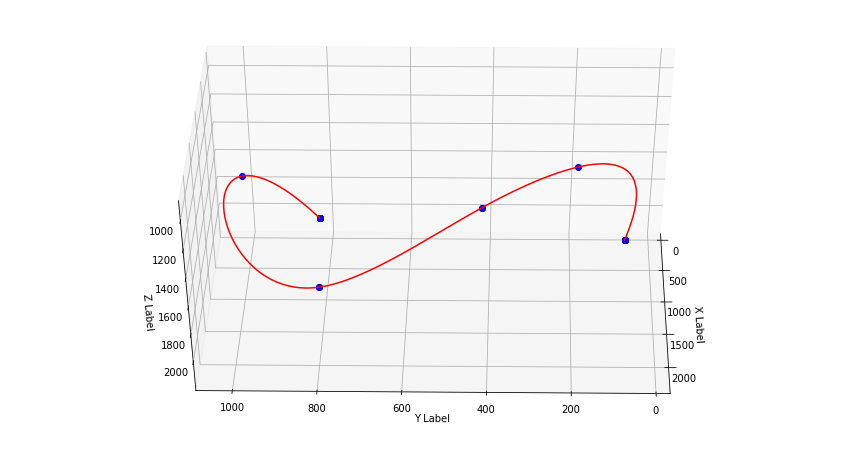

In [3]:
#https://stackoverflow.com/questions/18962175/spline-interpolation-coefficients-of-a-line-curve-in-3d-space

total_rad = 10
z_factor = 3
noise = 0.1

x = [60, 660, 1050, 1290, 1860, 2220]
y = [60, 192.5, 420, 810, 960, 780]
#z = [73, 46, 50, 66, 31, 35]
z = [2190, 1380, 1500, 1980, 930, 1050]

num_true_pts = 200
s_true = np.linspace(0, total_rad, num_true_pts)
x_true = np.cos(s_true)
y_true = np.sin(s_true)
z_true = s_true/z_factor

num_sample_pts = 80
s_sample = np.linspace(0, total_rad, num_sample_pts)
x_sample = np.cos(s_sample) + noise * np.random.randn(num_sample_pts)
y_sample = np.sin(s_sample) + noise * np.random.randn(num_sample_pts)
z_sample = s_sample/z_factor + noise * np.random.randn(num_sample_pts)

tck, u = interpolate.splprep([x , y, z], s=3)
x_knots, y_knots, z_knots = interpolate.splev(tck[0], tck)
u_fine = np.linspace(0,1,num_true_pts)
x_fine, y_fine, z_fine = interpolate.splev(u_fine, tck)

fig2 = plt.figure(2)
ax3d = fig2.add_subplot(111, projection='3d')
ax3d.set_xlabel('X Label')
ax3d.set_ylabel('Y Label')
ax3d.set_zlabel('Z Label')
#ax3d.plot(x_true, y_true, z_true, 'b')
ax3d.plot(x, y, z, 'bo')
ax3d.plot(x_knots, y_knots, z_knots, 'bo')
ax3d.plot(x_fine, y_fine, z_fine, 'r')
fig2.set_size_inches(15, 8)
fig2.show()

for angle in range(0, 360):
   ax3d.view_init(1400, angle)

plt.show()

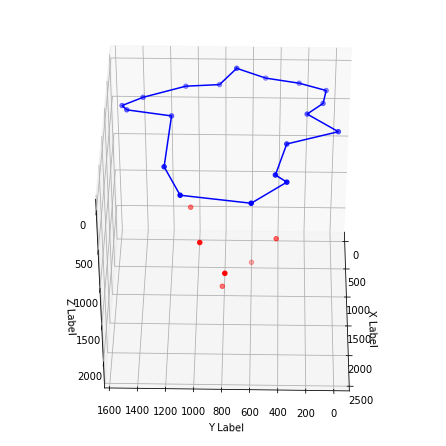

In [4]:
#https://stackoverflow.com/questions/46040382/spline-interpolation-in-3d-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
x = np.array([600, 660, 1050, 1290, 1860, 2220])
y = np.array([600, 1050, 420, 810, 960, 780])
x2 = np.array([0, 180, 270, 402, 642, 840, 1152, 1380, 1920, 2040, 2400, 2280, 1800, 900, 798, 720, 564, 348, 312, 0])
y2 = np.array([720, 510, 270, 78, 102, 216, 0, 360, 438, 360, 600, 1080, 1200, 1170, 1488, 1524, 1380, 1080, 840, 720])
#z = np.array([73, 46, 50, 66, 31, 35]) 
z = np.array([2190, 1380, 1500, 1980, 930, 1050])
z2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
fig = plt.figure(figsize=(6, 6))
ax = axes3d.Axes3D(fig)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter3D(x,y,z, c='r')
ax.scatter3D(x2, y2, z2, c='b')
ax.plot(x2, y2, z2, c='b')

for angle in range(0, 360):
   ax.view_init(320, angle)

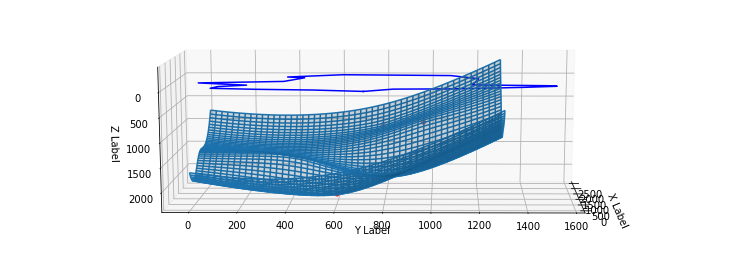

In [5]:
x_grid = np.linspace(0, 2500, 1000*len(x))
y_grid = np.linspace(0, 1300, 1000*len(y))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros((x.size, z.size))

import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

Z = spline(B1,B2)
fig = plt.figure(figsize=(10,3.46))
ax = axes3d.Axes3D(fig)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')
ax.plot(x2, y2, z2, c='b')

for angle in range(0, 360):
   ax.view_init(2350, angle)

plt.show()

#numpy stl, other forums
#repair stl web app - netfabb and autodesk 360 
#craftcloud article

from stl import mesh
import matplotlib.tri as mtri

tri = mtri.Triangulation(x, y)

data = np.zeros(len(tri.triangles), dtype=mesh.Mesh.dtype)
surf_mesh = mesh.Mesh(data, remove_empty_areas=False)
surf_mesh.x[:] = x[tri.triangles]
surf_mesh.y[:] = y[tri.triangles]
surf_mesh.z[:] = z[tri.triangles]
surf_mesh.save('surf_mesh.stl')

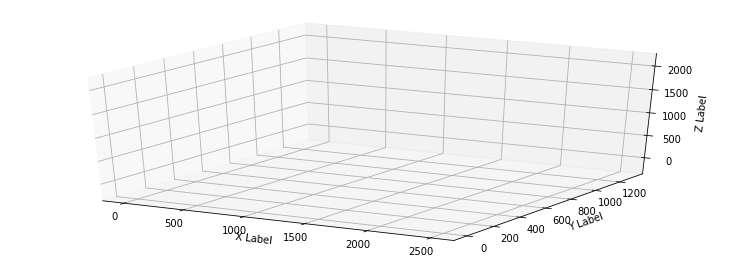

In [6]:
fig = plt.figure(figsize=(10,3.46))
ax = axes3d.Axes3D(fig)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

B1_flat = B1.flatten()
B2_flat = B2.flatten()
Z_flat = Z.flatten()

ax.plot_trisurf(B1_flat, B2_flat, Z_flat, triangles=tri.triangles, cmap='viridis')

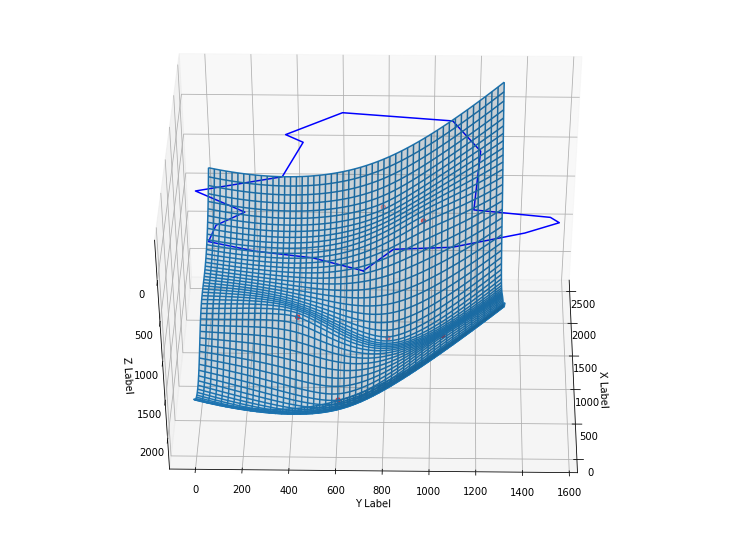

In [7]:
x_grid = np.linspace(0, 2500, 1000*len(x))
y_grid = np.linspace(0, 1300, 1000*len(y))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros((x.size, z.size))

import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

Z = spline(B1,B2)
fig = plt.figure(figsize=(10,7.28))
ax = axes3d.Axes3D(fig)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')
ax.plot(x2, y2, z2, c='b')

for angle in range(0, 360):
   ax.view_init(2380, angle)

plt.show()

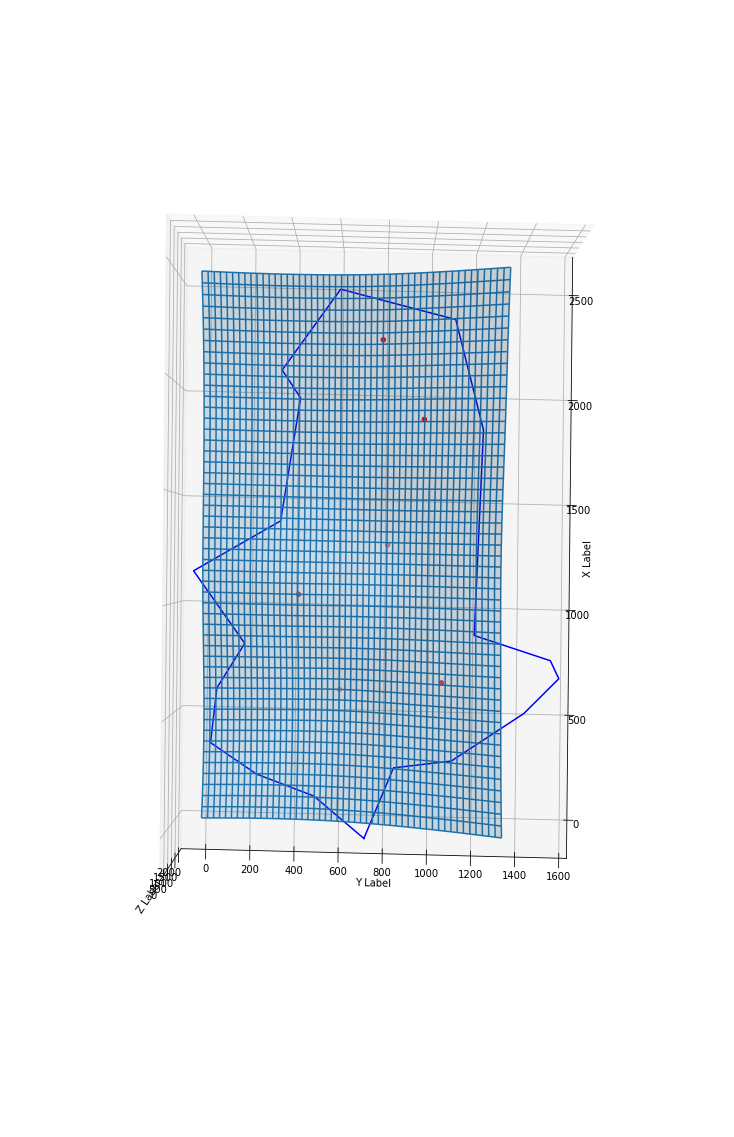

In [8]:
x_grid = np.linspace(0, 2500, 1000*len(x))
y_grid = np.linspace(0, 1300, 1000*len(y))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros((x.size, z.size))

import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

Z = spline(B1,B2)
fig = plt.figure(figsize=(10,15.6))
ax = axes3d.Axes3D(fig)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')
ax.plot(x2, y2, z2, c='b')

for angle in range(0, 360):
   ax.view_init(2430, angle)

#ax.set_aspect('1.25')
plt.show()